In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os 
os.chdir('/content/drive/Shareddrives/AC297r Project - RFCx /code/image_augmentation/')

In [4]:
!pip install numpy requests nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 24.8 MB/s 


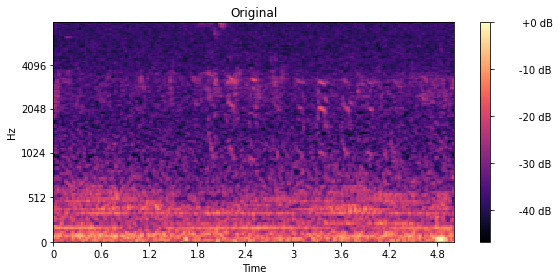

In [5]:
from nlpaug.util.audio.loader import AudioLoader
from nlpaug.util.audio.visualizer import AudioVisualizer

path  = '/content/drive/Shareddrives/AC297r Project - RFCx /audio_data/train/audio/p/Amazona_vittata/26229134_45.61-46.46.wav'

data = AudioLoader.load_mel_spectrogram(path, n_mels=128)
AudioVisualizer.spectrogram('Original', data)

In [6]:
import nlpaug.augmenter.spectrogram as nas
import nlpaug.flow as naf

Frequency Mask

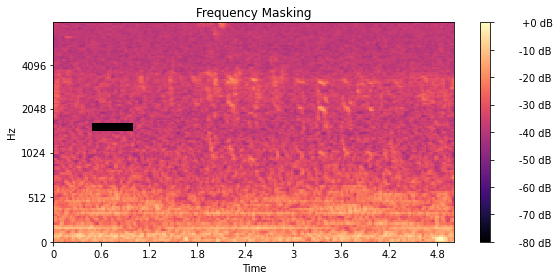

In [23]:
aug = nas.FrequencyMaskingAug(zone=(0.1, 0.2),factor=(5, 10))
aug_data = aug.substitute(data)
AudioVisualizer.spectrogram('Frequency Masking', aug_data)

Time Mask

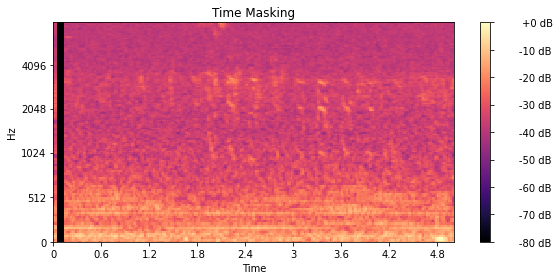

In [24]:
#粗细不变/只左右移
aug = nas.TimeMaskingAug(zone=(0.01, 0.03))
aug_data = aug.substitute(data)
AudioVisualizer.spectrogram('Time Masking', aug_data)

Loudness

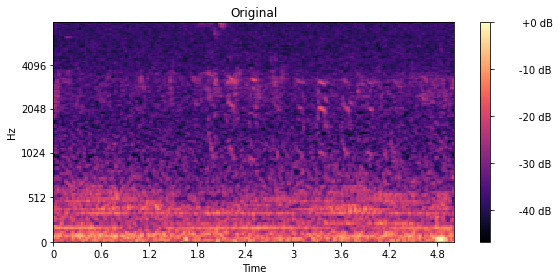

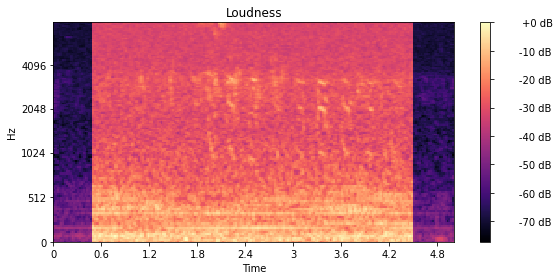

In [49]:
#spectrogram 确定dB范围, zone factor 单独
AudioVisualizer.spectrogram('Original', data)
aug = nas.LoudnessAug(zone=(0.1,0.9),factor=(2,6))

aug_data = aug.substitute(data)
AudioVisualizer.spectrogram('Loudness', aug_data)

In [ ]:
#add noise